In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(patchwork)
library(tibble)
library(qs)
library(ggplot2)
library(ggridges)
library(tidyr)
library(RColorBrewer)
library(readxl)
library(stringr)
library(ggpubr) 
library(viridis)

seed <- 123
set.seed(seed)
options(dplyr.summarise.inform = FALSE)
setwd("/home/a.garg/integration_project/step_14/11march_final")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


qs 0.25.6

Loading required package: viridisLite



In [222]:
AD_before_annot <- readRDS(file = "/home/a.garg/integration_project/step_14/ADwithout_white_before_annot.rds")
AD_before_annot$barcode <- gsub("(-|_|[0-9]+)", "", rownames(AD_before_annot@meta.data))

In [253]:
AD_before_annot

An object of class Seurat 
97133 features across 7884 samples within 4 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 layers present: data, scale.data
 3 other assays present: Spatial, SCT, RNA
 2 dimensional reductions calculated: pca, umap
 3 images present: slice1, slice1.2, slice1.3

In [279]:
AD_before_annot@assays$RNA$`counts.1`["P2RY12",] %>% table
AD_before_annot@assays$RNA$`counts.2`["P2RY12",] %>% table
AD_before_annot@assays$RNA$`counts.3`["P2RY12",] %>% table

.
   0    1    2 
2721   35    1 

.
   0    1    2 
2038    9    1 

.
   0    1 
3066   13 

In [283]:
AD_before_annot@assays$SCT$counts["P2RY12",] %>% table

.
   0    1 
7847   37 

In [288]:
AD_before_annot <- JoinLayers(AD_before_annot, assay="Spatial")

In [291]:
AD_before_annot@meta.data[,paste0("P2RY12","_expr")] <- GetAssayData(AD_before_annot, slot = "counts", assay="Spatial")["P2RY12", ]
AD_before_annot@meta.data[,paste0("P2RY12","_pos")] <- AD_before_annot@meta.data[,paste0("P2RY12","_expr")] > 0

In [293]:
table(AD_before_annot@meta.data$P2RY12_pos, AD_before_annot@meta.data$layer_annotation)

       
        Layer 1 Layer 2 Layer 3 Layer 4 Layer 5 Layer 6
  FALSE     332     774    2585    1052    1859    1223
  TRUE        1       5      26       6       9      12

In [296]:
table(AD_before_annot@meta.data$P2RY12_pos, AD_before_annot@meta.data$sample_ID)

       
        AD-1 AD-2 AD-3
  FALSE 2721 2038 3066
  TRUE    36   10   13

In [295]:
table(AD_before_annot@meta.data$P2RY12_pos, AD_before_annot@meta.data$layer_annotation, AD_before_annot@meta.data$sample_ID)

, ,  = AD-1

       
        Layer 1 Layer 2 Layer 3 Layer 4 Layer 5 Layer 6
  FALSE      61     187    1067     446     461     499
  TRUE        1       2      15       4       7       7

, ,  = AD-2

       
        Layer 1 Layer 2 Layer 3 Layer 4 Layer 5 Layer 6
  FALSE       0     146     535     226     723     408
  TRUE        0       1       3       2       1       3

, ,  = AD-3

       
        Layer 1 Layer 2 Layer 3 Layer 4 Layer 5 Layer 6
  FALSE     271     441     983     380     675     316
  TRUE        0       2       8       0       1       2


In [294]:
table(AD_before_annot@meta.data$P2RY12_pos, AD_before_annot@meta.data$sample_ID)

       
        AD-1 AD-2 AD-3
  FALSE 2721 2038 3066
  TRUE    36   10   13

In [275]:
AD_before_annot@assays$Spatial$`counts.1`["P2RY12",] %>% table
AD_before_annot@assays$Spatial$`counts.2`["P2RY12",] %>% table
AD_before_annot@assays$Spatial$`counts.3`["P2RY12",] %>% table

.
   0    1    2 
2721   35    1 

.
   0    1    2 
2038    9    1 

.
   0    1 
3066   13 

In [252]:
nebula <- readRDS("/home/dricardo/work/2021_trem2_adad_snRNAseq/work/spatial_transcriptomics/nebula_custom_models/ab_vs_lvl1.rds")
nebula$summary[nebula$summary$gene == "P2RY12",]

,logFC_(Intercept),logFC_my_groupAb,logFC_NEU_dcon,logFC_MG_dcon,se_(Intercept),se_my_groupAb,se_NEU_dcon,se_MG_dcon,p_(Intercept),p_my_groupAb,p_NEU_dcon,p_MG_dcon,gene_id,gene,ident.1,ident.2,subset1,subset2,group.by,model
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
3700,-5.13628,-0.0302028,3.189722,12.6814,0.429464,0.3643172,2.022312,4.110225,5.773936e-33,0.9339291,0.1147345,0.002033267,4181,P2RY12,Ab,Level 1,All,All,AB,~ my_group + NEU_dcon + MG_dcon


Using loupe browser output

In [223]:
AD_before_annot$barcode <- paste(AD_before_annot$barcode,AD_before_annot$original_ID, sep = "_")

In [152]:
P2RY12_positive_spots <- read.csv(file = "/home/a.garg/integration_project/step_14/11march_final/P2RY12_positive3.csv")
P2RY12_positive_spots$Original_ID <- gsub("P2RY12_positive_", "", P2RY12_positive_spots$P2RY12_positive)
P2RY12_positive_spots$Barcode_ed <- gsub("-[0-9]+", "", P2RY12_positive_spots$Barcode)
P2RY12_positive_spots$Barcode_ed <- paste(P2RY12_positive_spots$Barcode_ed,P2RY12_positive_spots$Original_ID, sep = "_")

##################
#P2RY12_positive_spots_ADsample <- P2RY12_positive_spots[grepl("2-3|2-8|T4857", P2RY12_positive_spots$Original_ID),]
#P2RY12_positive_spots_ADsample_ed <- P2RY12_positive_spots_ADsample[unique(P2RY12_positive_spots_ADsample$Barcode_ed) %in% AD_before_annot$barcode,]

In [225]:
head(P2RY12_positive_spots)

,Barcode,P2RY12_positive,Original_ID,Barcode_ed
,<chr>,<chr>,<chr>,<chr>
1,AAAGGCCCTATAATAC-1,P2RY12_positive_T4857,T4857,AAAGGCCCTATAATAC_T4857
2,AAGGCTGTGCTCATCG-1,P2RY12_positive_T4857,T4857,AAGGCTGTGCTCATCG_T4857
3,ACAGGTGTGTTGTTGC-1,P2RY12_positive_T4857,T4857,ACAGGTGTGTTGTTGC_T4857
4,ACCATCGTATATGGTA-1,P2RY12_positive_T4857,T4857,ACCATCGTATATGGTA_T4857
5,AGCGAGACGTGAAGGC-1,P2RY12_positive_T4857,T4857,AGCGAGACGTGAAGGC_T4857
6,ATGGCAGCATTACGAT-1,P2RY12_positive_T4857,T4857,ATGGCAGCATTACGAT_T4857


In [235]:
merged_data2 <- merge(x = AD_before_annot@meta.data,
                     y = P2RY12_positive_spots,
                     by.x = c("barcode"), 
                     by.y = c("Barcode_ed"),
                     all.x = TRUE, # Perform a left join
                     all.y = FALSE) 

In [236]:
table(merged_data2$P2RY12_positive)


  P2RY12_positive_2-3   P2RY12_positive_2-8 P2RY12_positive_T4857 
                   26                    10                    13 

In [239]:
table(merged_data2$sample_ID, merged_data2$P2RY12_positive)

      
       P2RY12_positive_2-3 P2RY12_positive_2-8 P2RY12_positive_T4857
  AD-1                  26                   0                     0
  AD-2                   0                  10                     0
  AD-3                   0                   0                    13

In [237]:
table(merged_data2$P2RY12_positive, merged_data2$layer_annotation)

                       
                        Layer 1 Layer 2 Layer 3 Layer 4 Layer 5 Layer 6
  P2RY12_positive_2-3         1       2       9       3       7       4
  P2RY12_positive_2-8         0       1       3       2       1       3
  P2RY12_positive_T4857       0       2       8       0       1       2

In [241]:
table(merged_data2$P2RY12_positive, merged_data2$AB)
table(merged_data2$P2RY12_positive, merged_data2$AT8)

                       
                        Level 0 Level 1 Level 2 Level 3 Other
  P2RY12_positive_2-3         5      13       8       0     0
  P2RY12_positive_2-8         2       4       1       3     0
  P2RY12_positive_T4857       1       4       4       1     3

                       
                        Level 0 Level 1 Level 2 Level 3 Other
  P2RY12_positive_2-3        13       9       4       0     0
  P2RY12_positive_2-8         0       5       2       2     1
  P2RY12_positive_T4857       0       5       3       2     3

In [84]:
#AD_before_annot@meta.data$original_ID[grepl("AAAGGCCCTATAATAC", rownames(AD_before_annot@meta.data))]

[1] "2-3"   "T4857"

In [18]:
layer_data <- data.frame(
  AD = c("AD-1", "AD-2", "AD-3"),
  Layer2 = c(8, 14, 64),
  Layer3 = c(104, 58, 648),
  Layer4 = c(86, 52, 273),
  Layer5 = c(158, 305, 1246),
  Layer6 = c(401, 433, 1196)
)
layer_data

AD,Layer2,Layer3,Layer4,Layer5,Layer6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AD-1,8,104,86,158,401
AD-2,14,58,52,305,433
AD-3,64,648,273,1246,1196


In [19]:
wilcox.test(layer_data$Layer2 ~layer_data$Layer3) 

ERROR: Error in wilcox.test.formula(layer_data$Layer2 ~ layer_data$Layer3): grouping factor must have exactly 2 levels


In [28]:
MW_test <- apply(layer_data[, c("Layer2", "Layer3")], 1, function(x) {
  u <- wilcox.test(x, layer_data$Layer4 + layer_data$Layer5 + layer_data$Layer6, alternative = "two.sided")
# c(u$statistic, u$p.value)
  u$p.value
})
MW_test

[1] 0.2 0.2 0.4

In [27]:
MW_test <- apply(layer_data[, c("Layer2", "Layer3")], 1, function(x) {
apply(layer_data[, c("Layer4","Layer5", "Layer6")], 1, function(y)  {
  #  print(x)  
   # print(y)

   u <- wilcox.test(x, y, alternative = "two.sided")
u$p.value
 # u <- wilcox.test(x, layer_data$Layer4 + layer_data$Layer5 + layer_data$Layer6, alternative = "two.sided")
# c(u$statistic, u$p.value)
 # u$p.value
})})
MW_test

0.4,0.2,1.0
0.4,0.4,0.8
0.2,0.2,0.4


In [32]:
# Data
layer_data <- data.frame(
  AD = c("AD-1", "AD-2", "AD-3"),
  Layer2 = c(8, 14, 64),
  Layer3 = c(104, 58, 648),
  Layer4 = c(86, 52, 273),
  Layer5 = c(158, 305, 1246),
  Layer6 = c(401, 433, 1196)
)

# Mann-Whitney U test
MW_test <- apply(layer_data[, c("Layer2", "Layer3")], 1, function(x) {
  u <- wilcox.test(x, layer_data$Layer4 + layer_data$Layer5 + layer_data$Layer6, alternative = "two.sided")
  c(u$statistic, u$p.value)
})
MW_results <- data.frame(AD = layer_data$AD, U_statistic = MW_test[1, ], p_value = MW_test[2, ])

# Wilcoxon signed-rank test
Wilcox_test <- apply(layer_data[, c("Layer2", "Layer3")], 1, function(x) {
  w <- wilcox.test(x, layer_data$Layer4 + layer_data$Layer5 + layer_data$Layer6,alternative = "two.sided")
  c(w$statistic, w$p.value)
})
Wilcox_results <- data.frame(AD = layer_data$AD, W_statistic = Wilcox_test[1, ], p_value = Wilcox_test[2, ])

print("Mann-Whitney U test results:")
print(MW_results)

print("Wilcoxon signed-rank test results:")
print(Wilcox_results)


[1] "Mann-Whitney U test results:"
    AD U_statistic p_value
1 AD-1           0     0.2
2 AD-2           0     0.2
3 AD-3           1     0.4
[1] "Wilcoxon signed-rank test results:"
    AD W_statistic p_value
1 AD-1           0     0.2
2 AD-2           0     0.2
3 AD-3           1     0.4


In [33]:
# Data
layer_data <- data.frame(
  AD = c("AD-1", "AD-2", "AD-3"),
  Layer2 = c(0.0851,0.413,0.158),
  Layer3 = c(0.051,0.022,0.442),
  Layer4 = c(0.06,0.021,0.817),
  Layer5 = c(0.124,0.133, 2.885),
  Layer6 = c(0.562,0.31,14.901)
)

# Mann-Whitney U test
MW_test <- apply(layer_data[, c("Layer2", "Layer3")], 1, function(x) {
  u <- wilcox.test(x, layer_data$Layer4 + layer_data$Layer5 + layer_data$Layer6, alternative = "two.sided")
  c(u$statistic, u$p.value)
})
MW_results <- data.frame(AD = layer_data$AD, U_statistic = MW_test[1, ], p_value = MW_test[2, ])

# Wilcoxon signed-rank test
Wilcox_test <- apply(layer_data[, c("Layer2", "Layer3")], 1, function(x) {
  w <- wilcox.test(x, layer_data$Layer4 + layer_data$Layer5 + layer_data$Layer6,alternative = "two.sided")
  c(w$statistic, w$p.value)
})
Wilcox_results <- data.frame(AD = layer_data$AD, W_statistic = Wilcox_test[1, ], p_value = Wilcox_test[2, ])

print("Mann-Whitney U test results:")
print(MW_results)

print("Wilcoxon signed-rank test results:")
print(Wilcox_results)


[1] "Mann-Whitney U test results:"
    AD U_statistic p_value
1 AD-1           0     0.2
2 AD-2           0     0.2
3 AD-3           0     0.2
[1] "Wilcoxon signed-rank test results:"
    AD W_statistic p_value
1 AD-1           0     0.2
2 AD-2           0     0.2
3 AD-3           0     0.2


comparitive plots

In [174]:
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12_stats.xlsx", sheet = "Sheet3", .name_repair = "minimal")
tail(exl_file)

Layer,Sample,Fraction,Pval1,Area,Pval1
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Layer4-6,AD-2,0.50232019,0.2,0.310,0.2
Layer2-3,AD-3,0.01767468,0.4,0.158,0.2
Layer2-3,AD-3,0.17895609,0.4,0.442,0.2
Layer4-6,AD-3,0.07539354,0.4,0.817,0.2
Layer4-6,AD-3,0.34410384,0.4,2.885,0.2
Layer4-6,AD-3,0.33029550,0.4,14.901,0.2


Layer,Sample,sd,Fraction
<chr>,<chr>,<dbl>,<dbl>
Layer2-3,AD-1,0.08725225,0.07197943
Layer2-3,AD-2,0.03609362,0.04176334
Layer2-3,AD-3,0.11404318,0.09831538
Layer4-6,AD-1,0.21215236,0.27634961
Layer4-6,AD-2,0.22492741,0.30549111
Layer4-6,AD-3,0.15131144,0.24993096


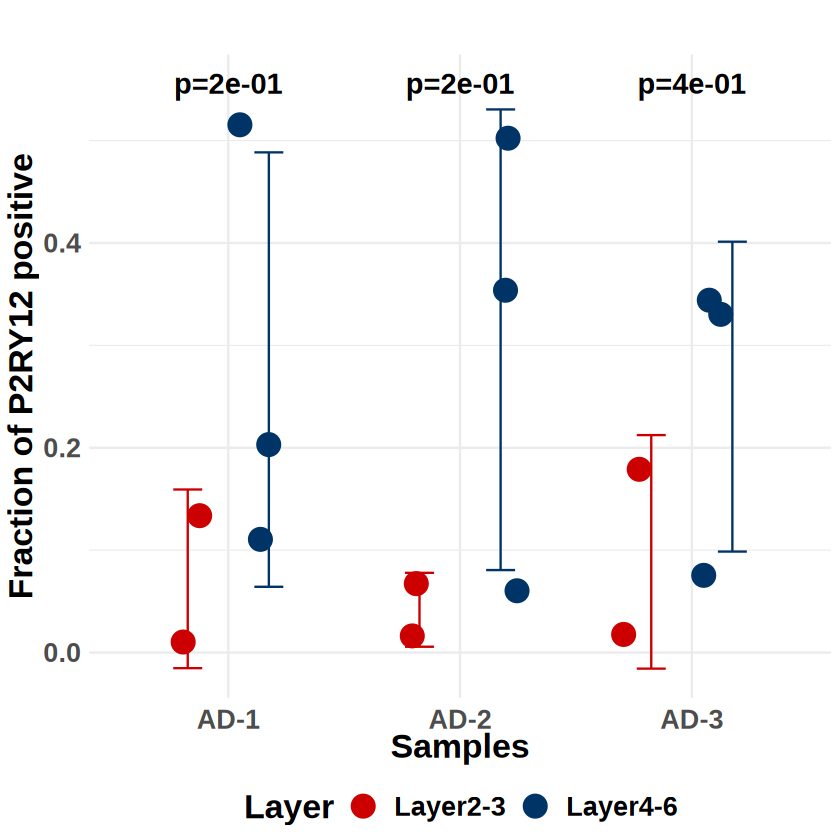

In [184]:
library(ggplot2)

# Load data
data <- (exl_file)[, c(1:4)]
data$Pval1 <- format(data$Pval1, digits = 3, scientific = TRUE)

# Summary statistics
df.summary <- data %>%
  group_by(Layer, Sample) %>%
  summarise(
    sd = sd(Fraction, na.rm = TRUE),
    Fraction = mean(Fraction)
  )
  df.summary 
# Plot
p <- ggplot(data, aes(x = Sample, y = Fraction, color = Layer)) +
  geom_jitter(position = position_jitterdodge(jitter.width = 0.3, dodge.width = 0.8), size = 6) +
  geom_errorbar(data = df.summary, aes(ymin = Fraction - sd, ymax = Fraction + sd), 
                position = position_dodge(width = 0.7), width = 0.25) +
  scale_color_manual(values = c("#CC0000", "#003366")) +
  labs(title = "",
       x = "Sample",
       y = "Fraction") +
  theme_minimal()+
theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 0, vjust = 0.25)
         ) +xlab("Samples")+ylab("Fraction of P2RY12 positive")+
           annotate("text", x = c(1, 2, 3), y = max(data$Fraction)+0.04,
           label = paste("p=",sep = "",data$Pval1[c(1,6,11)]), size = 6, fontface = "bold")+theme(legend.position="bottom")

ggsave(p,filename =  "/home/a.garg/integration_project/step_14/11march_final/Fraction_P2RY12_positive.pdf",  width = 5,height = 5,bg ="white")
p


Layer,Sample,sd,Area
<chr>,<chr>,<dbl>,<dbl>
Layer2-3,AD-1,0.02411234,0.0680500
Layer2-3,AD-2,0.27647875,0.2175000
Layer2-3,AD-3,0.20081833,0.3000000
Layer4-6,AD-1,0.27323494,0.2486667
Layer4-6,AD-2,0.14571319,0.1546667
Layer4-6,AD-3,7.60504149,6.2010000


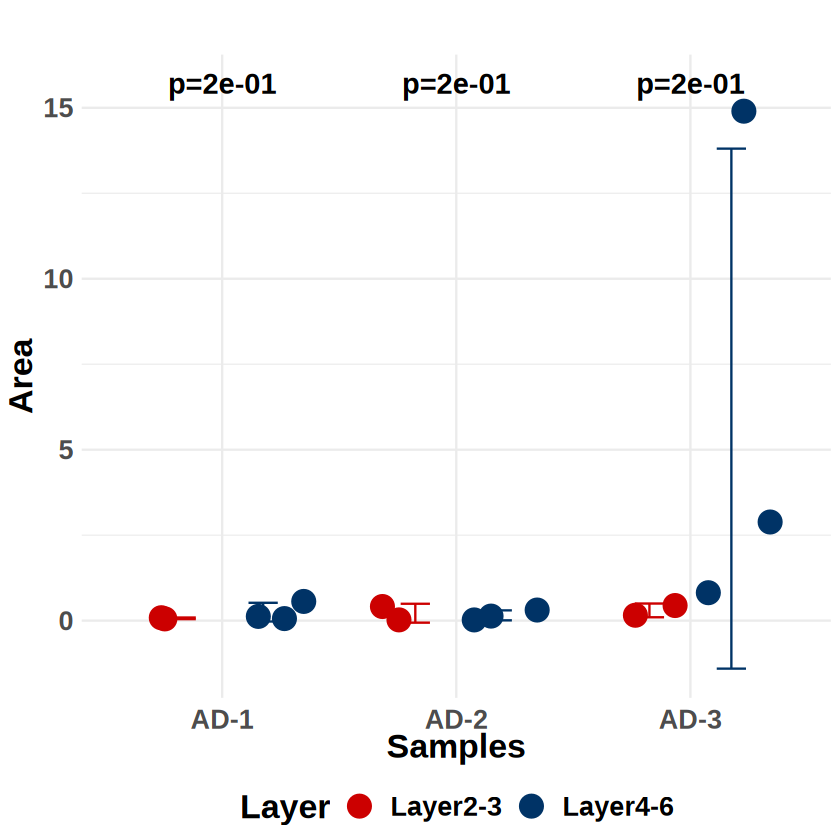

In [182]:
library(ggplot2)

# Load data
data <- (exl_file)[, c(1:2,5:6)]
data$Pval1 <- format(data$Pval1, digits = 3, scientific = TRUE)

# Summary statistics
df.summary <- data %>%
  group_by(Layer, Sample) %>%
  summarise(
    sd = sd(Area, na.rm = TRUE),
    Area = mean(Area)
  )
  df.summary 
# Plot
p <- ggplot(data, aes(x = Sample, y = Area, color = Layer)) +
  geom_jitter(position = position_jitterdodge(jitter.width = 0.3, dodge.width = 0.8), size = 6) +
  geom_errorbar(data = df.summary, aes(ymin = Area - sd, ymax = Area + sd), 
                position = position_dodge(width = 0.7), width = 0.25) +
  scale_color_manual(values = c("#CC0000", "#003366")) +
  labs(title = "",
       x = "Sample",
       y = "Area") +
  theme_minimal()+
theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 0, vjust = 0.25)
         ) +xlab("Samples")+ylab("Area")+
           annotate("text", x = c(1, 2, 3), y = max(data$Area)+0.8,
           label = paste("p=",sep = "",data$Pval1[c(1,6,11)]), size = 6, fontface = "bold")+theme(legend.position="bottom")

ggsave(p,filename =  "/home/a.garg/integration_project/step_14/11march_final/check.pdf",  width = 5,height = 5,bg ="white")
p

statistical test 

In [15]:
# AD - P2RY12 + Counts : Without % corrected
layer23<- c(112.00,72.00,712.00)
layer46 <- c(645.00,790.00,2715.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 1, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -1.5528, df = 2.3815, p-value = 0.2408
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3672.804  1503.471
sample estimates:
mean of x mean of y 
 298.6667 1383.3333 


In [16]:
# AD - P2RY12 + Counts: % corrected
layer23<- c(0.147952444,0.083526682,0.207761891)
layer46 <- c(0.852047556,0.916473318,0.792238109)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -13.94, df = 4, p-value = 0.0001536
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8480231 -0.5663223
sample estimates:
mean of x mean of y 
0.1464137 0.8535863 


In [18]:
#  AD - % of area with P2RY12+ signals : Without % corrected
layer23<- c(0.14,0.44,0.60)
layer46 <- c(0.75,0.46,17.70)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 1, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -1.0367, df = 2.0022, p-value = 0.4087
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -30.41119  18.59119
sample estimates:
mean of x mean of y 
0.3933333 6.3033333 


In [19]:
# AD -  % of area with P2RY12+ signals : % corrected
layer23<- c(0.154290897,0.483870968,0.032783302)
layer46 <- c(0.845709103,0.516129032,0.967216698)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -2.9002, df = 4, p-value = 0.04411
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.08182241 -0.02358404
sample estimates:
mean of x mean of y 
0.2236484 0.7763516 


In [20]:
# CT - P2RY12 + Counts : Without % corrected
layer23<- c(56.00,232.00,59.00)
layer46 <- c(509.00,545.00,238.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -2.7873, df = 3.2761, p-value = 0.06203
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -658.10953   28.10953
sample estimates:
mean of x mean of y 
 115.6667  430.6667 


In [21]:
# CT - P2RY12 + Counts :  % corrected
layer23<- c(0.099115044,0.298584299,0.198653199)
layer46 <- c(0.900884956,0.701415701,0.801346801)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -7.3979, df = 4, p-value = 0.001781
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8285260 -0.3763373
sample estimates:
mean of x mean of y 
0.1987842 0.8012158 


In [22]:
# CT -  % of area with P2RY12+ signals : without % corrected
layer23<- c(0.08,0.09,0.09)
layer46 <- c(0.36,0.56,0.20)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")

Warning message in wilcox.test.default(layer23, layer46, alternative = "two.sided"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  layer23 and layer46
W = 0, p-value = 0.07652
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -2.7514, df = 2.0041, p-value = 0.1104
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7340827  0.1607493
sample estimates:
 mean of x  mean of y 
0.08666667 0.37333333 


In [23]:
# CT -  % of area with P2RY12+ signals : % corrected
layer23<- c(0.191343964,0.142201835,0.310954064)
layer46 <- c(0.808656036,0.857798165,0.689045936)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -8.048, df = 4, p-value = 0.001294
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7670910 -0.3735758
sample estimates:
mean of x mean of y 
0.2148333 0.7851667 


In [13]:
# Ab+ spots without % corrected
layer23<- c(463.00,290.00,236.00)
layer46 <- c(272.00,320.00,153.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 6, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = 0.96176, df = 3.6475, p-value = 0.3955
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -162.6883  325.3550
sample estimates:
mean of x mean of y 
 329.6667  248.3333 


In [10]:
# Ab+ spots with % corrected
layer23<- c(0.629931973,0.475409836,0.606683805)
layer46 <- c(0.370068027,0.524590164,0.393316195)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 8, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = 2.0778, df = 4, p-value = 0.1063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04752592  0.33022674
sample estimates:
mean of x mean of y 
0.5706752 0.4293248 


Ab- spots 

In [3]:
# Ab- spots without % corrected
layer23<- c(1368.00,507.00,1440.00)
layer46 <- c(1680.00,1342.00,1516.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 2, p-value = 0.4
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -1.2933, df = 2.4193, p-value = 0.3056
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1561.7692   746.4359
sample estimates:
mean of x mean of y 
 1105.000  1512.667 


In [4]:
# Ab- spots with % corrected
layer23<- c(0.448818898,0.274202271,0.48714479)
layer46 <- c(0.551181102,0.725797729,0.51285521)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -2.0849, df = 4, p-value = 0.1054
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4505405  0.0640951
sample estimates:
mean of x mean of y 
0.4033887 0.5966113 


In [3]:
# AT8+ spots without % corrected
layer23<- c(561.00,383.00,200.00)
layer46 <- c(819.00,218.00,372.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 4, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -0.42428, df = 3.2029, p-value = 0.6983
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -727.7842  551.1175
sample estimates:
mean of x mean of y 
 381.3333  469.6667 


In [2]:
# AT8+ spots with % corrected
layer23<- c(0.406521739,0.637271215,0.34965035)
layer46 <- c(0.593478261,0.362728785,0.65034965)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 3, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -0.57119, df = 4, p-value = 0.5984
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4163373  0.2742617
sample estimates:
mean of x mean of y 
0.4644811 0.5355189 


In [4]:
# AT8- spots without % corrected
layer23<- c(1270.00,414.00,1476.00)
layer46 <- c(1133.00,1444.00,1297.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 4, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -0.70554, df = 2.3035, p-value = 0.545
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1520.719  1044.719
sample estimates:
mean of x mean of y 
 1053.333  1291.333 


In [5]:
# AT8- spots with % corrected
layer23<- c(0.528506034,0.222820237,0.532275514)
layer46 <- c(0.471493966,0.777179763,0.467724486)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 4, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -0.99495, df = 4, p-value = 0.3761
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5468453  0.2583144
sample estimates:
mean of x mean of y 
0.4278673 0.5721327 


 P2RY12+ and Aβ+ spots

In [2]:
#  P2RY12+ and Aβ+ spots spots without % corrected
layer23<- c(12.00,40.00,17.00)
layer46 <- c(20.00,101.00,53.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 1, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -1.3974, df = 2.5281, p-value = 0.2723
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -123.82426   53.82426
sample estimates:
mean of x mean of y 
       23        58 


In [3]:
#  P2RY12+ and Aβ+ spots spots with % corrected
layer23<- c(0.375,0.283687943,0.242857143)
layer46 <- c(0.625,0.716312057,0.757142857)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -7.222, df = 4, p-value = 0.00195
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5523510 -0.2455889
sample estimates:
mean of x mean of y 
 0.300515  0.699485 


In [4]:
#  P2RY12+ and Ab- spots without % corrected
layer23<- c(51.00,80.00,47.00)
layer46 <- c(248.00,403.00,364.00)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -5.8496, df = 2.1991, p-value = 0.02236
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -467.40372  -90.59628
sample estimates:
mean of x mean of y 
 59.33333 338.33333 


In [5]:
#  P2RY12+ and Ab- spots with % corrected
layer23<- c(0.170568562,0.16563147,0.114355231)
layer46 <- c(0.829431438,0.83436853,0.885644769)
wilcox.test(layer23, layer46, alternative = "two.sided")
t.test(layer23, layer46, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer46
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer46
t = -27.528, df = 4, p-value = 1.036e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7701948 -0.6290649
sample estimates:
mean of x mean of y 
0.1501851 0.8498149 


layer 23 and layer 5-6

In [1]:
# AD - P2RY12 + Counts : Without % corrected
layer23<- c(112.00,72.00,712.00)
layer56 <- c(559.00,738.00,2442.00)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 1, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -1.493, df = 2.4693, p-value = 0.2508
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3237.019  1341.686
sample estimates:
mean of x mean of y 
 298.6667 1246.3333 


In [2]:
# AD - P2RY12 + Counts: % corrected
layer23<- c(0.166915052,0.088888889,0.225745086)
layer56 <- c(0.833084948,0.911111111,0.774254914)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -12.113, df = 4, p-value = 0.0002665
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8345988 -0.5233359
sample estimates:
mean of x mean of y 
0.1605163 0.8394837 


In [3]:
#  AD - % of area with P2RY12+ signals : Without % corrected
layer23<- c(0.14,0.44,0.60)
layer56 <- c(0.69,0.44,16.89)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")

Warning message in wilcox.test.default(layer23, layer56, alternative = "two.sided"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  layer23 and layer56
W = 1.5, p-value = 0.2683
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -1.0311, df = 2.0025, p-value = 0.4107
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -29.00868  17.78201
sample estimates:
mean of x mean of y 
0.3933333 6.0066667 


In [4]:
# AD -  % of area with P2RY12+ signals : % corrected
layer23<- c(0.165551636,0.495444191,0.034315127)
layer56 <- c(0.834448364,0.504555809,0.965684873)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -2.7654, df = 4, p-value = 0.05057
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.075064377  0.002145649
sample estimates:
mean of x mean of y 
0.2317703 0.7682297 


In [5]:
# CT - P2RY12 + Counts : Without % corrected
layer23<- c(56.00,232.00,59.00)
layer56 <- c(426.00,407.00,207.00)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 1, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -2.5369, df = 3.8695, p-value = 0.06626
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -487.20597   25.20597
sample estimates:
mean of x mean of y 
 115.6667  346.6667 


In [6]:
# CT - P2RY12 + Counts :  % corrected
layer23<- c(0.116182573,0.363067293,0.221804511)
layer56 <- c(0.883817427,0.636932707,0.7781954891)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -5.2663, df = 4, p-value = 0.006228
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.8134394 -0.2518215
sample estimates:
mean of x mean of y 
0.2336848 0.7663152 


In [7]:
# CT -  % of area with P2RY12+ signals : without % corrected
layer23<- c(0.08,0.09,0.09)
layer56 <- c(0.31,0.47,0.15)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")

Warning message in wilcox.test.default(layer23, layer56, alternative = "two.sided"):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  layer23 and layer56
W = 0, p-value = 0.07652
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -2.4161, df = 2.0052, p-value = 0.1366
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6200657  0.1733991
sample estimates:
 mean of x  mean of y 
0.08666667 0.31000000 


In [8]:
# CT -  % of area with P2RY12+ signals : % corrected
layer23<- c(0.21319797,0.166071429,0.369747899)
layer56 <- c(0.78680203,0.833928571,0.630252101)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -5.7508, df = 4, p-value = 0.004533
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7423687 -0.2589415
sample estimates:
mean of x mean of y 
0.2496724 0.7503276 


Ab+ spots

In [15]:
# Ab+ spots without % corrected
layer23<- c(463.00,290.00,236.00)
layer56 <- c(129.00,244.00,104.00)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 8, p-value = 0.2
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = 2.1094, df = 3.3704, p-value = 0.1154
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -71.52134 412.85468
sample estimates:
mean of x mean of y 
 329.6667  159.0000 


In [16]:
# Ab+ spots with % corrected
layer23<- c(0.782094595,0.543071161,0.694117647)
layer56 <- c(0.217905405,0.456928839,0.305882353)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 9, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = 3.5072, df = 4, p-value = 0.02473
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07213509 0.62024278
sample estimates:
mean of x mean of y 
0.6730945 0.3269055 


Ab- spots

In [5]:
# Ab- spots without % corrected
layer23<- c(1368.00,507.00,1440.00)
layer56 <- c(1217.00,1146.00,1123.00)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 6, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -0.18933, df = 2.0356, p-value = 0.867
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1330.841  1216.841
sample estimates:
mean of x mean of y 
     1105      1162 


In [6]:
# Ab- spots with % corrected
layer23<- c(0.529206963,0.306715064,0.561841592)
layer56 <- c(0.470793037,0.693284936,0.438158408)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 4, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -0.60124, df = 4, p-value = 0.5801
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3828992  0.2465840
sample estimates:
mean of x mean of y 
0.4659212 0.5340788 


AD and CT

In [21]:
# % corrected
AD <- c(0.147952444,0.083526682,0.207761891,0.852047556,0.916473318,0.792238109)

CT <- c(0.099115044,0.298584299,0.198653199,0.900884956,0.701415701,0.801346801)

wilcox.test(AD, CT, alternative = "two.sided")
t.test(AD, CT, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  AD and CT
W = 3, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  AD and CT
t = -0.77195, df = 3.3492, p-value = 0.491
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2560806  0.1513396
sample estimates:
mean of x mean of y 
0.1464137 0.1987842 


In [22]:
# % corrected
AD <- c(0.150019818,0.170828379,0.679151803)

CT <- c(0.344722392,0.474069555,0.181208054)

wilcox.test(AD, CT, alternative = "two.sided")
t.test(AD, CT, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  AD and CT
W = 3, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  AD and CT
t = -1.7303e-09, df = 2.9072, p-value = 1
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6243114  0.6243114
sample estimates:
mean of x mean of y 
0.3333333 0.3333333 


 P2RY12+ and Aβ+ spots

In [6]:
#  P2RY12+ and Aβ+ spots spots without % corrected
layer23<- c(12.00,40.00,17.00)
layer56 <- c(14.00,88.00,35.00)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 3, p-value = 0.7
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -0.9586, df = 2.5993, p-value = 0.4182
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -104.92627   59.59294
sample estimates:
mean of x mean of y 
 23.00000  45.66667 


In [7]:
#  P2RY12+ and Aβ+ spots spots with % corrected
layer23<- c(0.461538462,0.3125,0.326923077)
layer56 <- c(0.538461538,0.6875,0.673076923)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -3.9636, df = 4, p-value = 0.01663
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.45237131 -0.07967997
sample estimates:
mean of x mean of y 
0.3669872 0.6330128 


In [8]:
#  P2RY12+ and Aβ- spots spots without % corrected
layer23<- c(51.00,80.00,47.00)
layer56 <- c(200.00,375.00,307.00)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -4.5141, df = 2.1664, p-value = 0.03933
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -442.65706  -26.67628
sample estimates:
mean of x mean of y 
 59.33333 294.00000 


In [9]:
#  P2RY12+ and Aβ- spots spots with % corrected
layer23<- c(0.203187251,0.175824176,0.132768362)
layer56 <- c(0.796812749,0.824175824,0.867231638)
wilcox.test(layer23, layer56, alternative = "two.sided")
t.test(layer23, layer56, alternative = "two.sided")


	Wilcoxon rank sum exact test

data:  layer23 and layer56
W = 0, p-value = 0.1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  layer23 and layer56
t = -22.729, df = 4, p-value = 2.219e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.7392897 -0.5783372
sample estimates:
mean of x mean of y 
0.1705933 0.8294067 


comparitive bar plot

In [50]:
# P2RY12 counts
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(1:3), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.000154,layer 2-3,0.14795244
AD-2,0.000154,layer 2-3,0.08352668
AD-3,0.000154,layer 2-3,0.20776189
AD-1,0.000154,layer 4-6,0.85204756
AD-2,0.000154,layer 4-6,0.91647332
AD-3,0.000154,layer 4-6,0.79223811


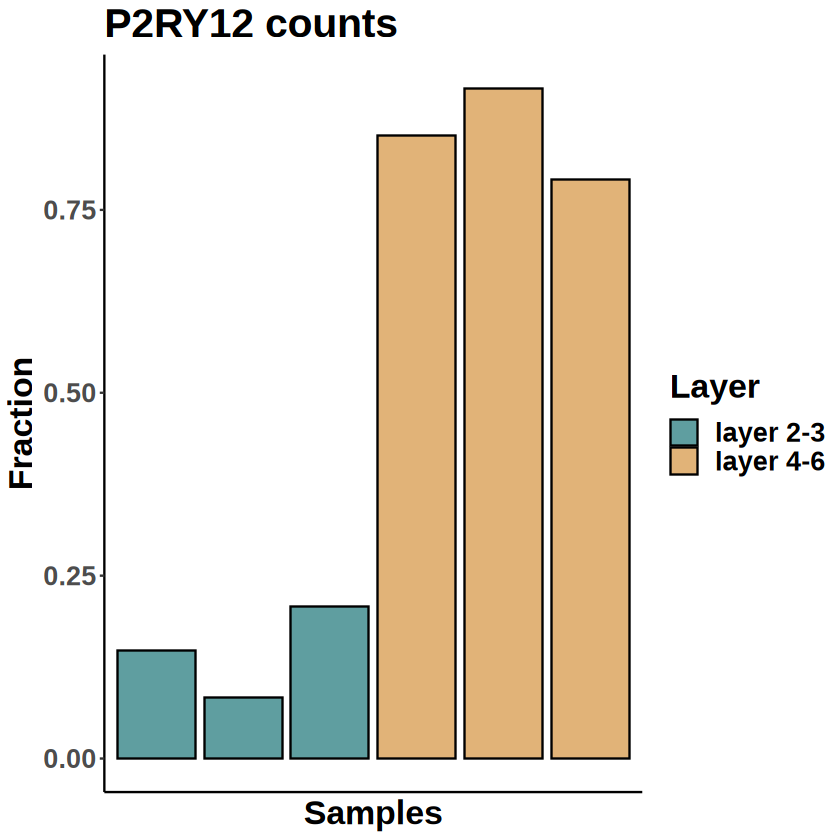

In [51]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12 counts")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  #NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_counts_wd_legend.pdf", width = 4,height =4,bg ="white")


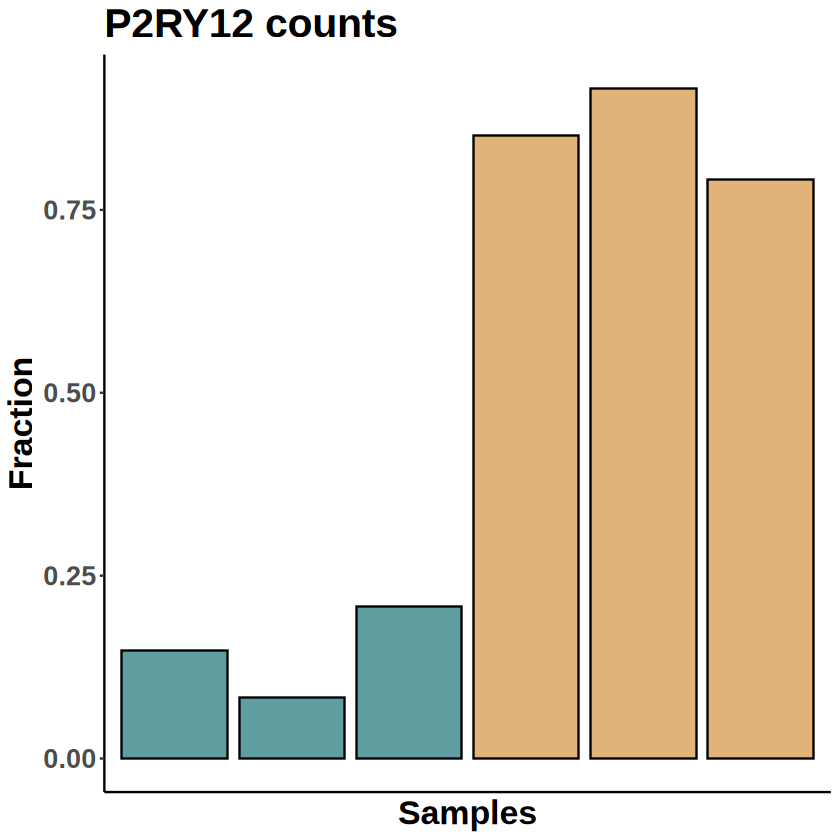

In [52]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12 counts")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_counts.pdf", width = 4,height =4,bg ="white")


In [53]:
# P2RY12 %area
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(4:6), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.04411,layer 2-3,0.1542909
AD-2,0.04411,layer 2-3,0.4838710
AD-3,0.04411,layer 2-3,0.0327833
AD-1,0.04411,layer 4-6,0.8457091
AD-2,0.04411,layer 4-6,0.5161290
AD-3,0.04411,layer 4-6,0.9672167


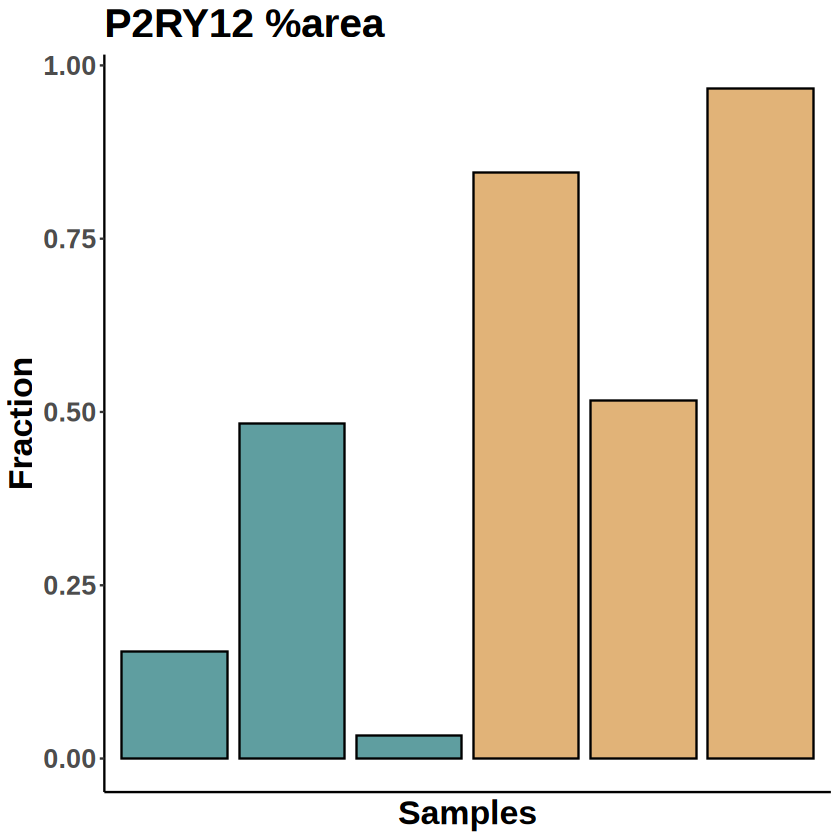

In [54]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12 %area")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(
      #axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_percent_area.pdf", width = 4,height =4,bg ="white")


In [55]:
# CT P2RY12 count
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(7:9), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
CT-1,0.001781,layer 2-3,0.09911504
CT-2,0.001781,layer 2-3,0.29858430
CT-3,0.001781,layer 2-3,0.19865320
CT-1,0.001781,layer 4-6,0.90088496
CT-2,0.001781,layer 4-6,0.70141570
CT-3,0.001781,layer 4-6,0.80134680


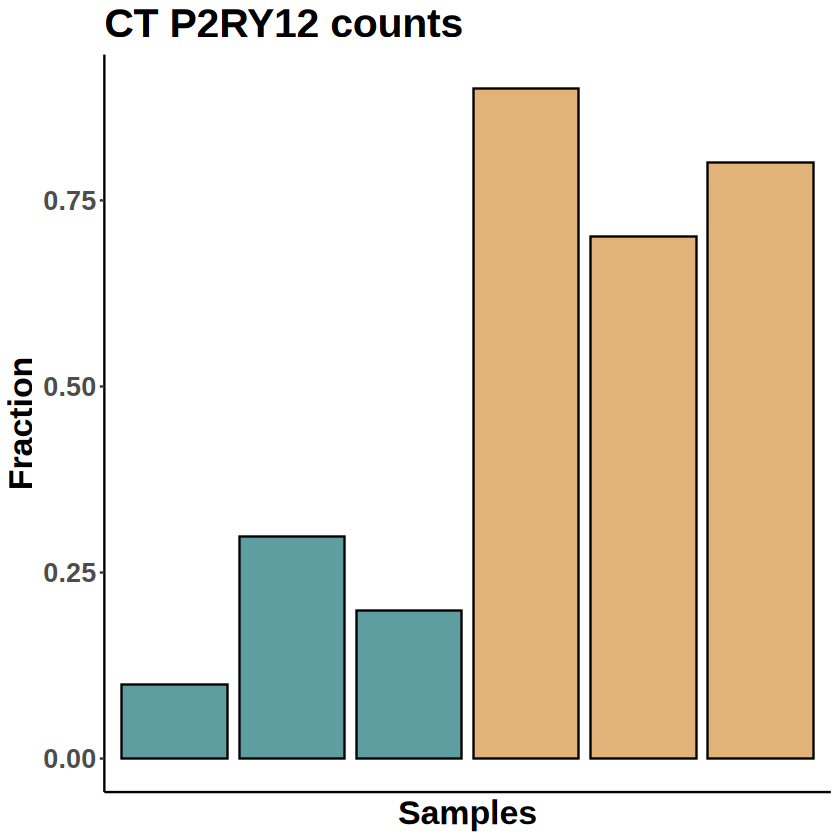

In [56]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("CT P2RY12 counts")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_count_CT.pdf", width = 4,height =4,bg ="white")


In [57]:
# CT P2RY12 % area
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(10:12), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
CT-1,0.001294,layer 2-3,0.1913440
CT-2,0.001294,layer 2-3,0.1422018
CT-3,0.001294,layer 2-3,0.3109541
CT-1,0.001294,layer 4-6,0.8086560
CT-2,0.001294,layer 4-6,0.8577982
CT-3,0.001294,layer 4-6,0.6890459


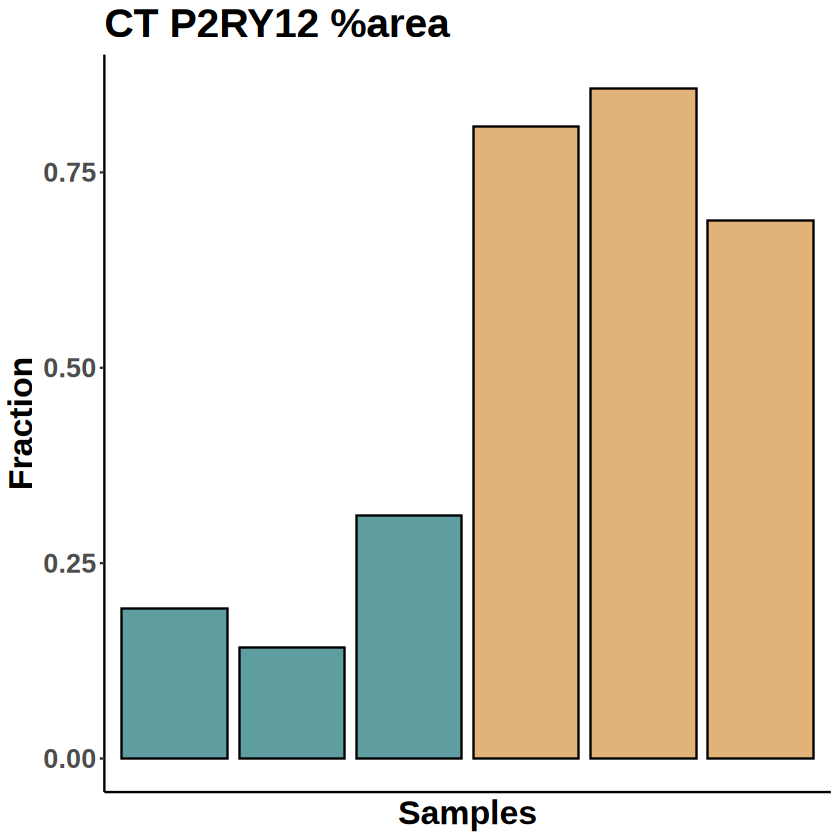

In [58]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("CT P2RY12 %area")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_percent_area_CT.pdf", width = 4,height =4,bg ="white")


In [10]:
# Aβ+ spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(13:15), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.106,layer 2-3,0.6299320
AD-2,0.106,layer 2-3,0.4754098
AD-3,0.106,layer 2-3,0.6066838
AD-1,0.106,layer 4-6,0.3700680
AD-2,0.106,layer 4-6,0.5245902
AD-3,0.106,layer 4-6,0.3933162


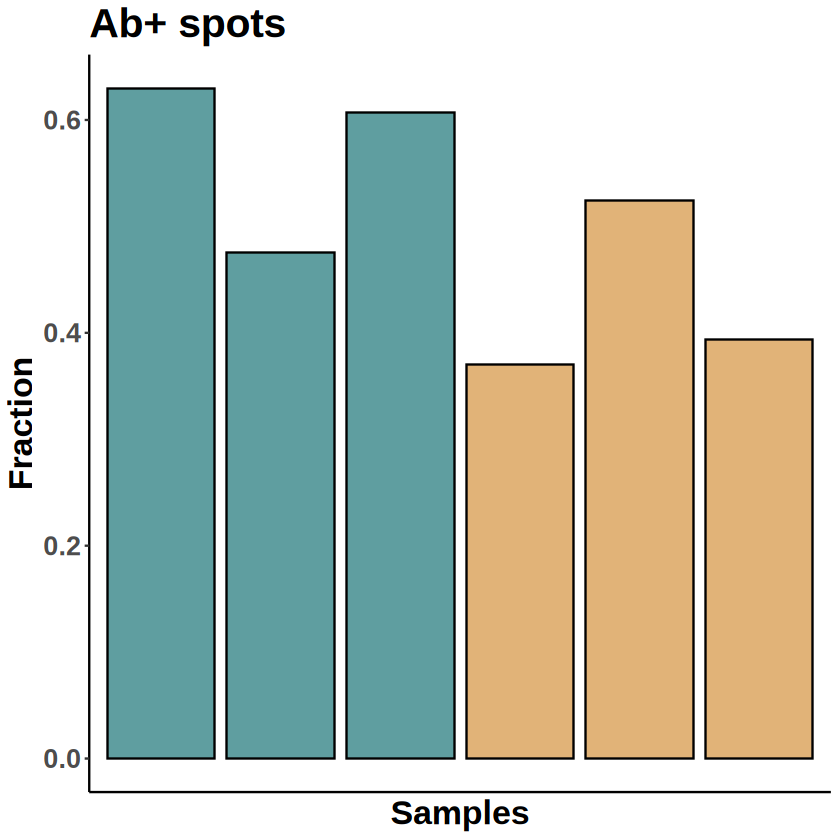

In [12]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("Ab+ spots")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/Aβpositive_spots_AD.pdf", width = 4,height =4,bg ="white")


In [13]:
# Aβ- spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(16:18), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.1054,layer 2-3,0.4488189
AD-2,0.1054,layer 2-3,0.2742023
AD-3,0.1054,layer 2-3,0.4871448
AD-1,0.1054,layer 4-6,0.5511811
AD-2,0.1054,layer 4-6,0.7257977
AD-3,0.1054,layer 4-6,0.5128552


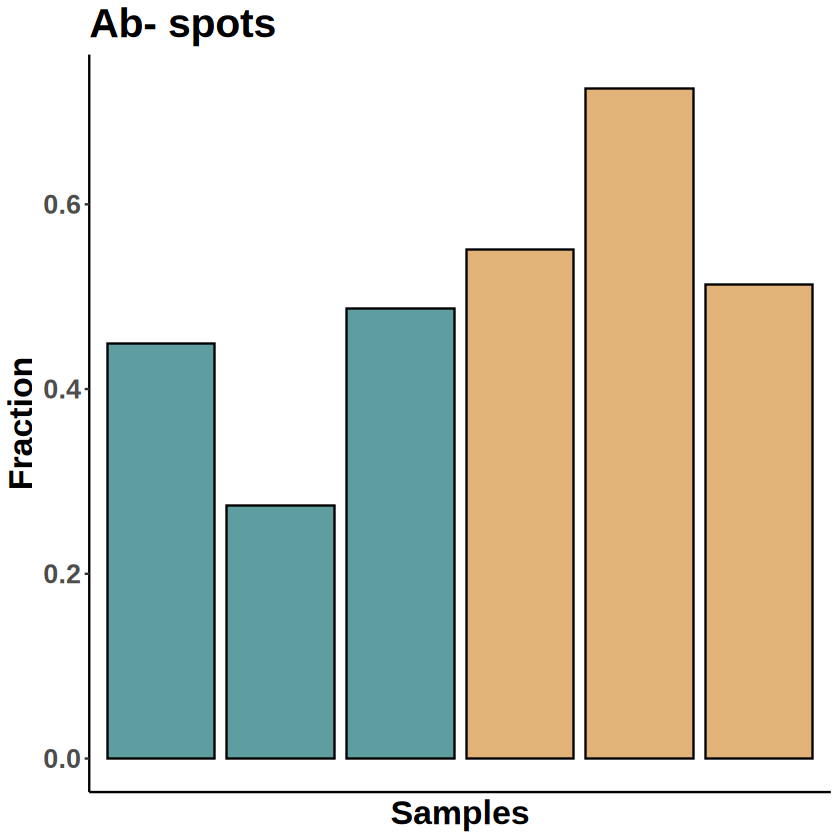

In [14]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("Ab- spots")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/Aβnegative_spots_AD.pdf", width = 4,height =4,bg ="white")


In [15]:
#  P2RY12+ and Aβ+ spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(19:21), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.00195,layer 2-3,0.3750000
AD-2,0.00195,layer 2-3,0.2836879
AD-3,0.00195,layer 2-3,0.2428571
AD-1,0.00195,layer 4-6,0.6250000
AD-2,0.00195,layer 4-6,0.7163121
AD-3,0.00195,layer 4-6,0.7571429


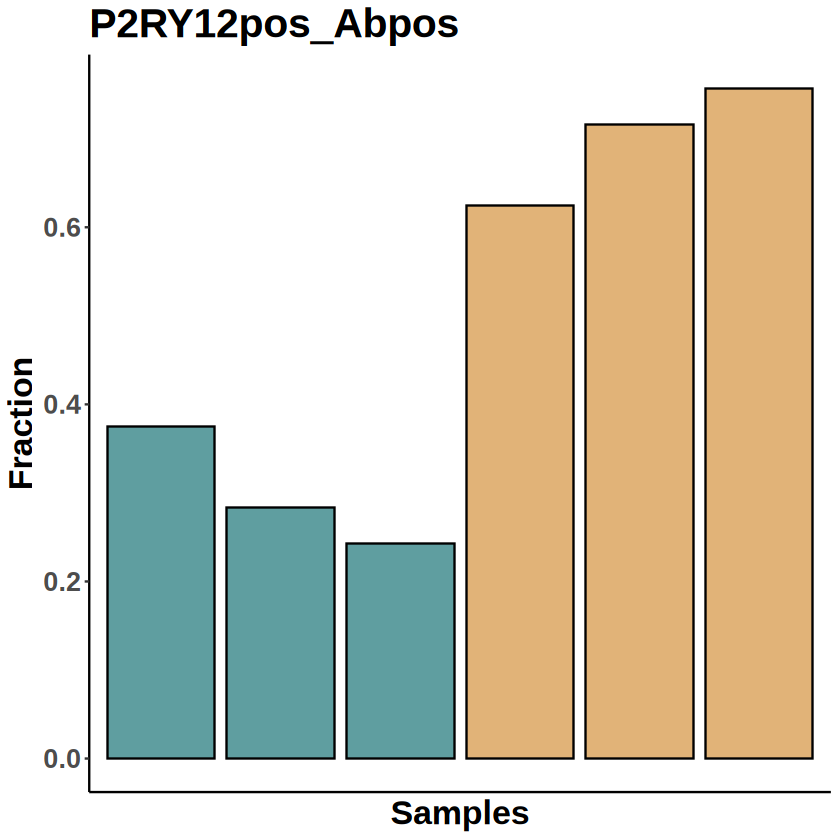

In [18]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12pos_Abpos")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12pos_Aβpos_spots_AD.pdf", width = 4,height =4,bg ="white")

In [20]:
#  P2RY12+ and Aβ- spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots", .name_repair = "minimal")
data <- exl_file[c(22:24), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 4-6`)
data_long

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,1.036e-05,layer 2-3,0.1705686
AD-2,1.036e-05,layer 2-3,0.1656315
AD-3,1.036e-05,layer 2-3,0.1143552
AD-1,1.036e-05,layer 4-6,0.8294314
AD-2,1.036e-05,layer 4-6,0.8343685
AD-3,1.036e-05,layer 4-6,0.8856448


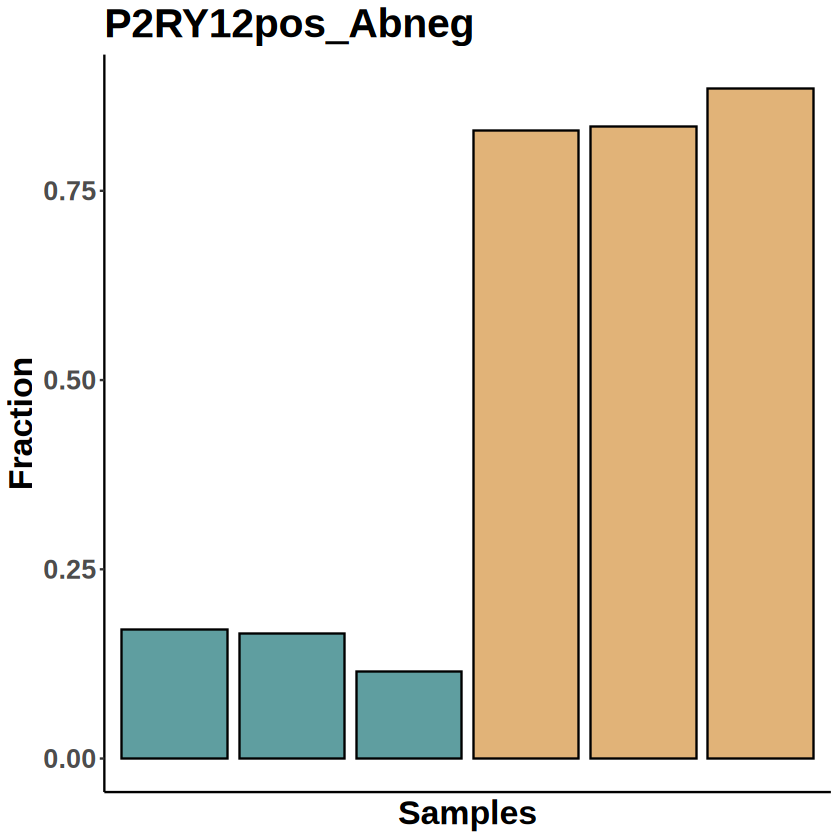

In [21]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12pos_Abneg")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#E1B378")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12pos_Aβneg_spots_AD.pdf", width = 4,height =4,bg ="white")

Layer 23 and 56

In [3]:
# P2RY12 counts
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(1:3), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))


Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.0002665,layer 2-3,0.16691505
AD-2,0.0002665,layer 2-3,0.08888889
AD-3,0.0002665,layer 2-3,0.22574509
AD-1,0.0002665,layer 5-6,0.83308495
AD-2,0.0002665,layer 5-6,0.91111111
AD-3,0.0002665,layer 5-6,0.77425491


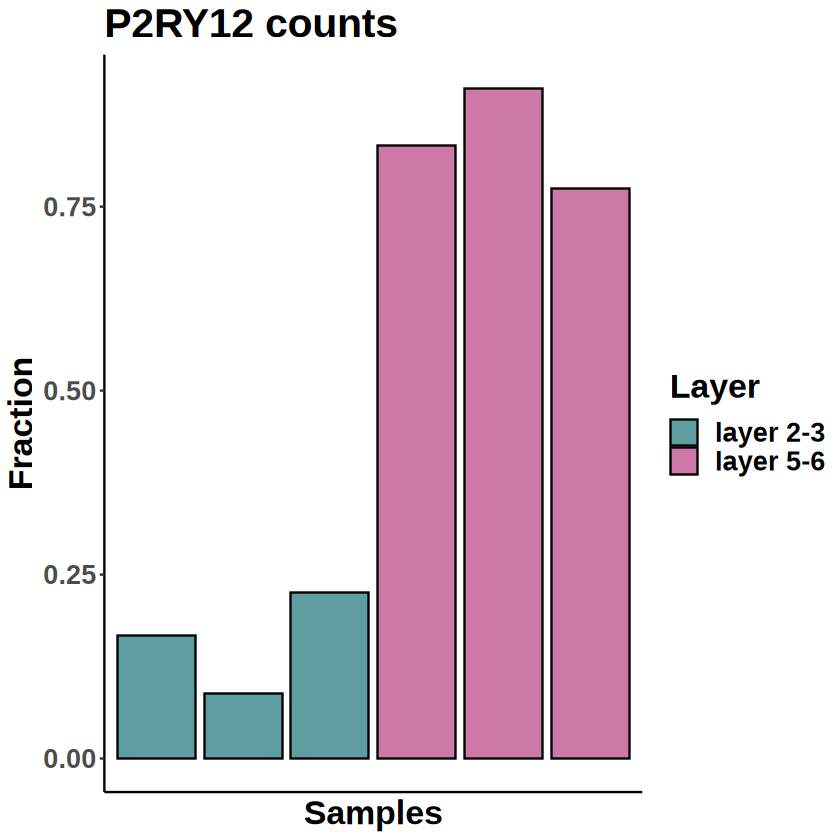

In [7]:

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12 counts")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  #NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_counts_wd_legend_L56.pdf", width = 4,height =4,bg ="white")



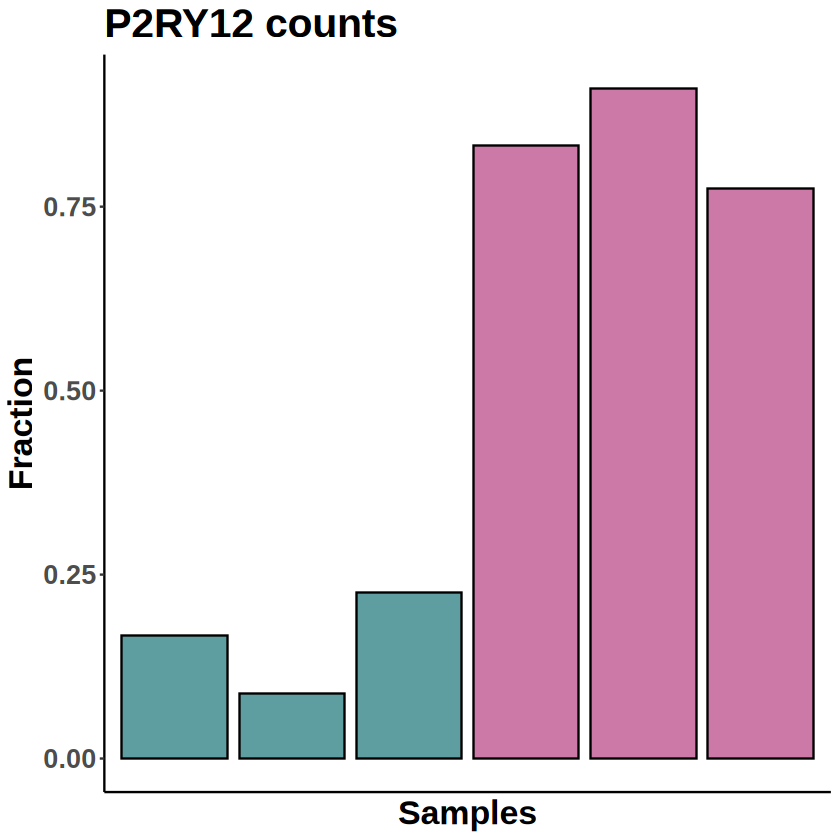

In [8]:

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12 counts")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_counts_L56.pdf", width = 4,height =4,bg ="white")



In [9]:
# P2RY12 %area
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(4:6), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.05057,layer 2-3,0.16555164
AD-2,0.05057,layer 2-3,0.49544419
AD-3,0.05057,layer 2-3,0.03431513
AD-1,0.05057,layer 5-6,0.83444836
AD-2,0.05057,layer 5-6,0.50455581
AD-3,0.05057,layer 5-6,0.96568487


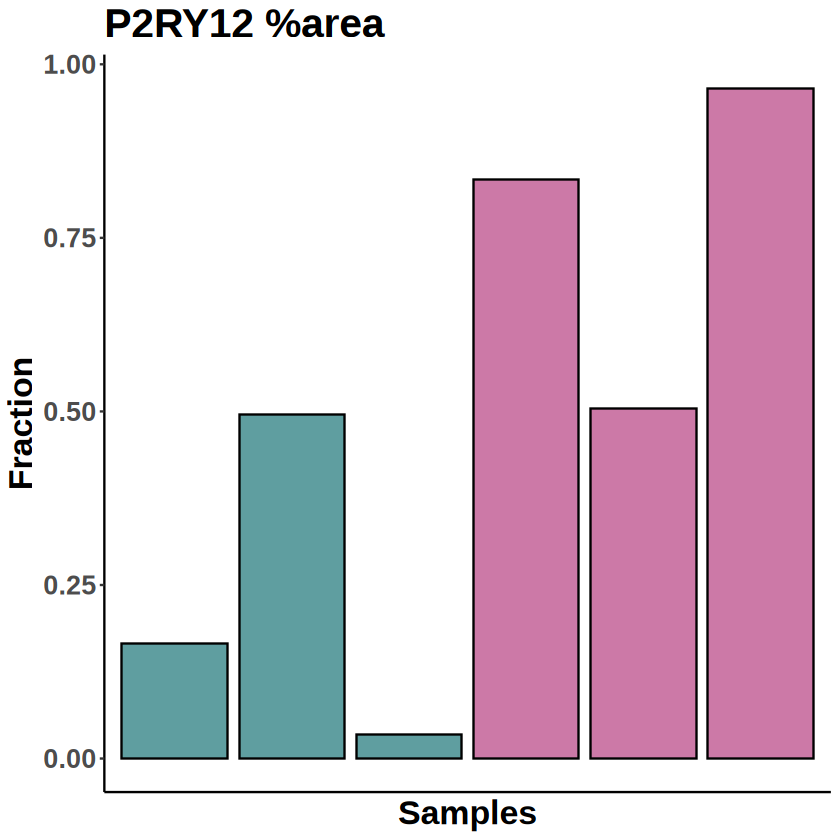

In [10]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12 %area")+
 theme_classic()+
 scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(
      #axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_percent_area_L56.pdf", width = 4,height =4,bg ="white")

In [11]:
# CT P2RY12 count
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(7:9), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
CT-1,0.006228,layer 2-3,0.1161826
CT-2,0.006228,layer 2-3,0.3630673
CT-3,0.006228,layer 2-3,0.2218045
CT-1,0.006228,layer 5-6,0.8838174
CT-2,0.006228,layer 5-6,0.6369327
CT-3,0.006228,layer 5-6,0.7781955


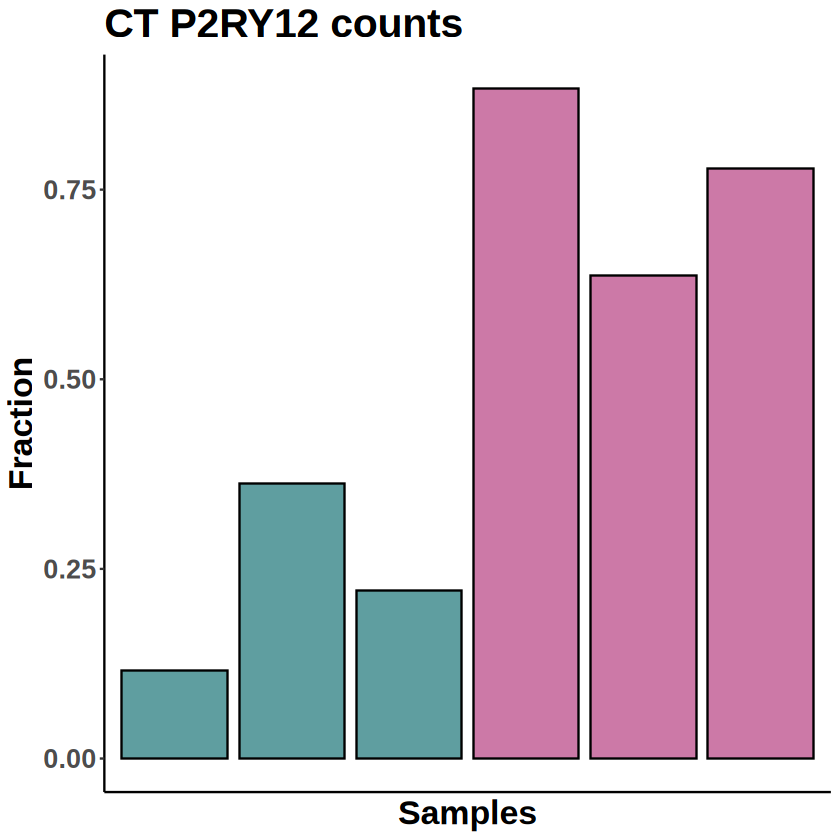

In [12]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("CT P2RY12 counts")+
 theme_classic()+
  scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_count_CT_L56.pdf", width = 4,height =4,bg ="white")

In [13]:
# CT P2RY12 % area
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(10:12), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
CT-1,0.004533,layer 2-3,0.2131980
CT-2,0.004533,layer 2-3,0.1660714
CT-3,0.004533,layer 2-3,0.3697479
CT-1,0.004533,layer 5-6,0.7868020
CT-2,0.004533,layer 5-6,0.8339286
CT-3,0.004533,layer 5-6,0.6302521


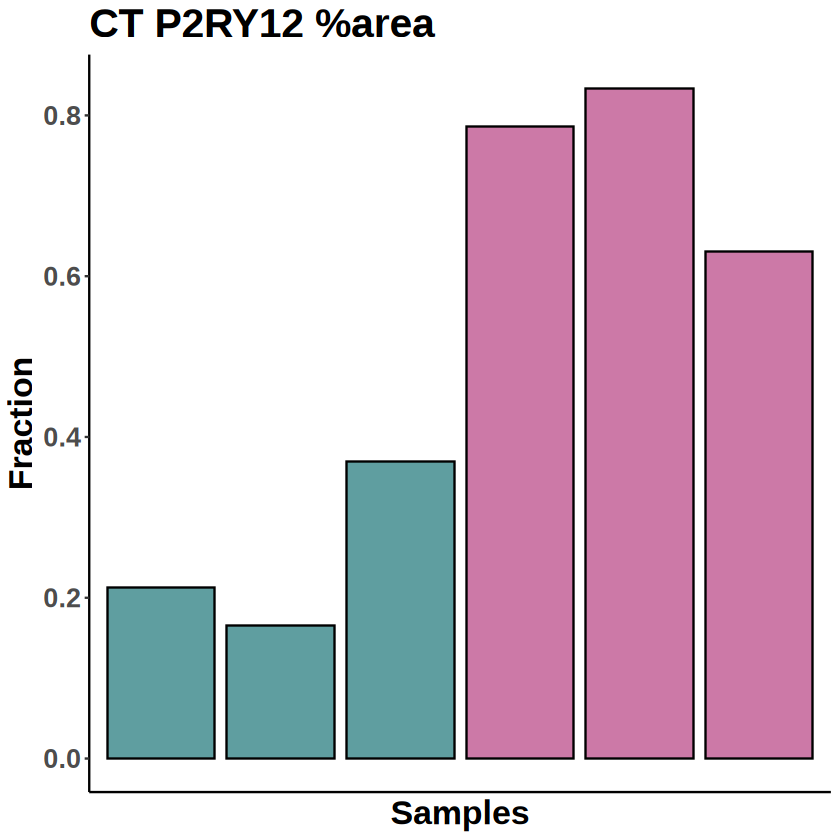

In [14]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("CT P2RY12 %area")+
 theme_classic()+
  scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12_percent_area_CT_L56.pdf", width = 4,height =4,bg ="white")



In [15]:
# Aβ+ spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(13:15), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.02473,layer 2-3,0.7820946
AD-2,0.02473,layer 2-3,0.5430712
AD-3,0.02473,layer 2-3,0.6941176
AD-1,0.02473,layer 5-6,0.2179054
AD-2,0.02473,layer 5-6,0.4569288
AD-3,0.02473,layer 5-6,0.3058824


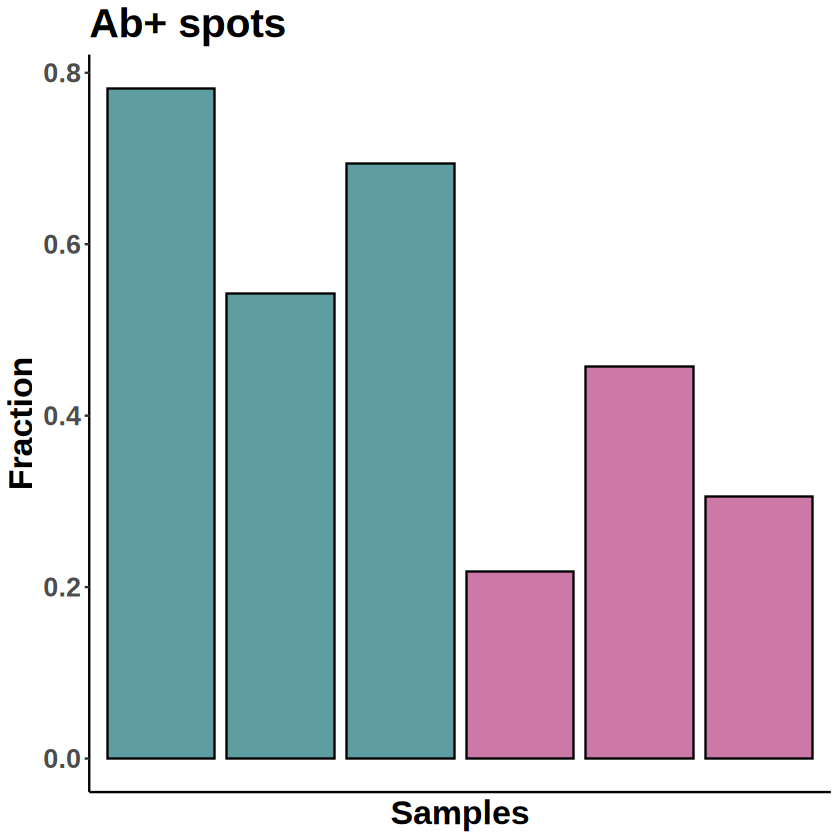

In [17]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("Ab+ spots")+
 theme_classic()+
  scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/Aβpositive_spots_AD_L56.pdf", width = 4,height =4,bg ="white")



In [18]:
# Aβ- spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(16:18), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.5801,layer 2-3,0.5292070
AD-2,0.5801,layer 2-3,0.3067151
AD-3,0.5801,layer 2-3,0.5618416
AD-1,0.5801,layer 5-6,0.4707930
AD-2,0.5801,layer 5-6,0.6932849
AD-3,0.5801,layer 5-6,0.4381584


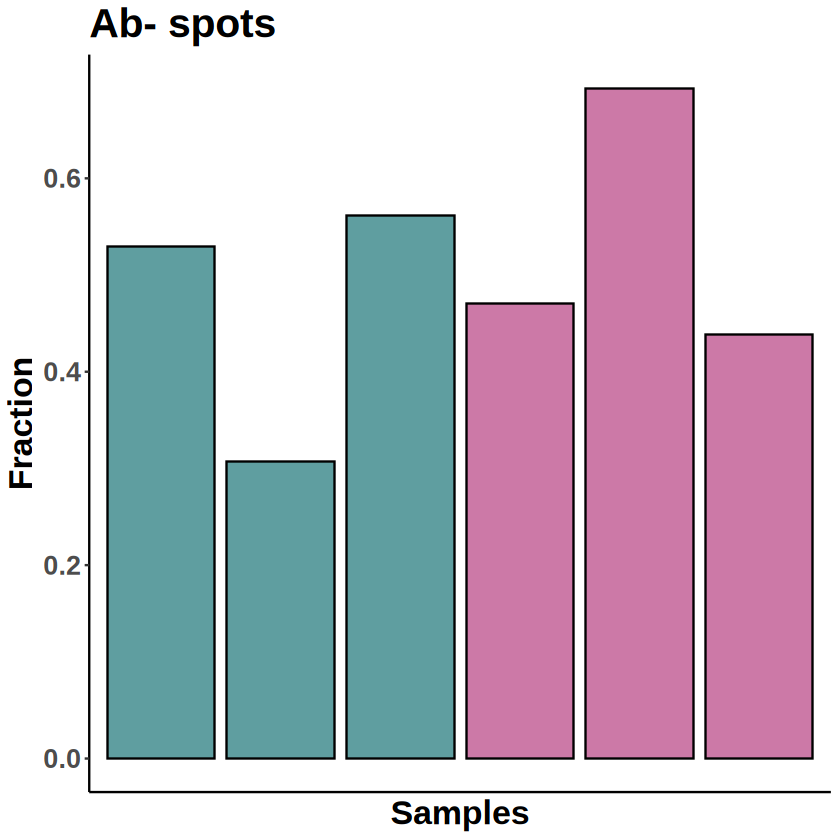

In [19]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("Ab- spots")+
 theme_classic()+
  scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/Aβnegative_spots_AD_L56.pdf", width = 4,height =4,bg ="white")

In [20]:
#  P2RY12+ and Aβ+ spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(19:21), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,0.0166,layer 2-3,0.4615385
AD-2,0.0166,layer 2-3,0.3125000
AD-3,0.0166,layer 2-3,0.3269231
AD-1,0.0166,layer 5-6,0.5384615
AD-2,0.0166,layer 5-6,0.6875000
AD-3,0.0166,layer 5-6,0.6730769


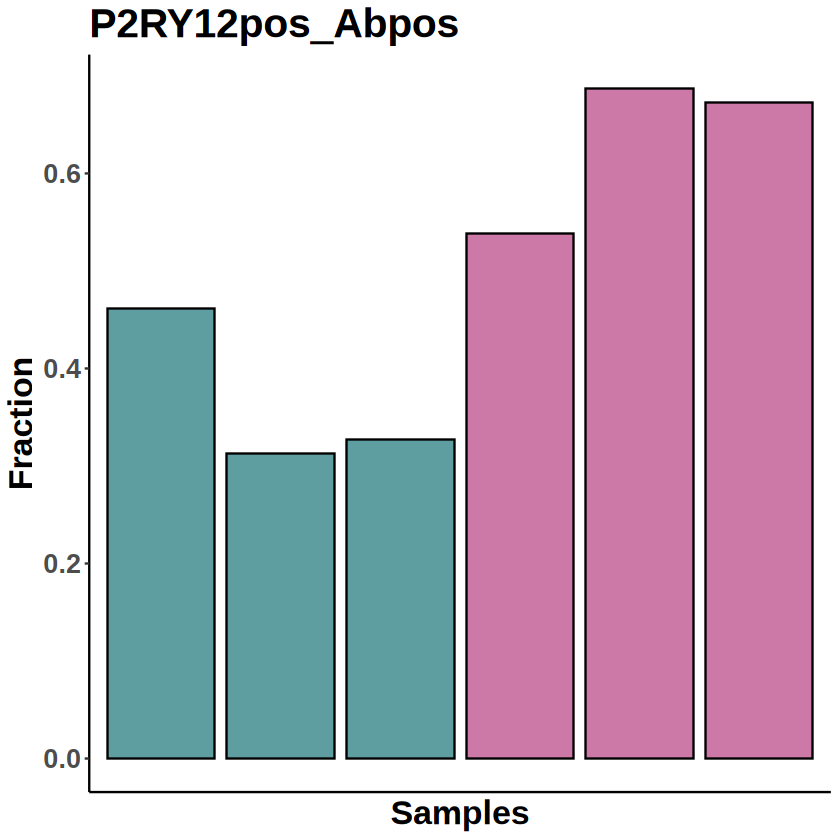

In [21]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12pos_Abpos")+
 theme_classic()+
  scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12pos_Aβpos_spots_AD_L56.pdf", width = 4,height =4,bg ="white")



In [22]:
#  P2RY12+ and Aβ- spots
exl_file <- read_excel("/home/a.garg/integration_project/step_14/11march_final/P2RY12 Visium Count_Sheeny-04.12.24.xlsx", sheet = "Plots2", .name_repair = "minimal")
data <- exl_file[c(22:24), c(1:4)]
data_long <- gather(data, key = "Layer", value = "Layer_Value", `layer 2-3`, `layer 5-6`)
data_long
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

Sample,Pval,Layer,Layer_Value
<chr>,<dbl>,<chr>,<dbl>
AD-1,2.219e-05,layer 2-3,0.2031873
AD-2,2.219e-05,layer 2-3,0.1758242
AD-3,2.219e-05,layer 2-3,0.1327684
AD-1,2.219e-05,layer 5-6,0.7968127
AD-2,2.219e-05,layer 5-6,0.8241758
AD-3,2.219e-05,layer 5-6,0.8672316


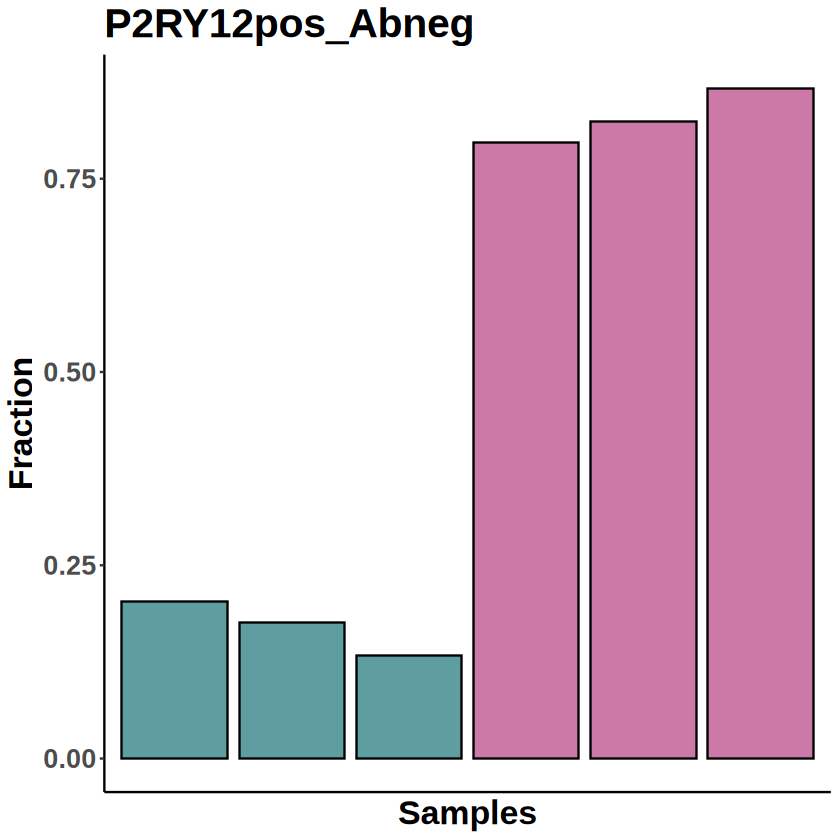

In [23]:
data_long$sample_Layer <- factor(paste(data_long$Layer, data_long$Sample), levels = unique(paste(data_long$Layer, data_long$Sample)))

# Iterate through unique levels of Cell_state
p <- ggplot(data_long, aes(x = sample_Layer, y = Layer_Value, fill = Layer)) +
  geom_bar(position = "dodge", stat = "identity", colour = 'black') +
ggtitle("P2RY12pos_Abneg")+
 theme_classic()+
  scale_fill_manual(values = c("#5F9EA0", "#CC79A7")) +
  theme(text = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  #stat_pvalue_manual(df_p_val, label = 'p.sci', y.position = max(df$Ab_Value) + 0.01, size = 6, face = "bold") +
  NoLegend() +
  xlab("Samples") +
  ylab("Fraction")+
   theme(#axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
plot(p)
ggsave(plot = p,"/home/a.garg/integration_project/step_14/11march_final/Plots/P2RY12pos_Aβneg_spots_AD_L56.pdf", width = 4,height =4,bg ="white")